<a href="https://colab.research.google.com/github/hwangswan/kaggle-digit-recognizer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Numpy
import numpy as np

# Pandas
import pandas as pd

import zipfile

import seaborn as sb


Mounting file from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Unzip sample data

In [ ]:
archive = zipfile.ZipFile('/gdrive/MyDrive/Colab Notebooks/digit-recognizer.zip')

for file in archive.namelist():
    archive.extract(file, '/content/data')

In [ ]:
train_csv = '/content/data/train.csv'
test_csv = '/content/data/test.csv'

In [ ]:
df = pd.read_csv(train_csv)
df.shape

(42000, 785)

In [ ]:
X, y = df.drop('label', axis = 1).values, df['label'].values

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([1, 0, 1, ..., 7, 6, 9])

Split data to train and validate

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape

(28140, 784)

In [ ]:
X_test.shape

(13860, 784)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Plotting some example

6
3
1
1
8
1
3
3
0


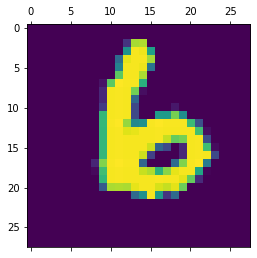

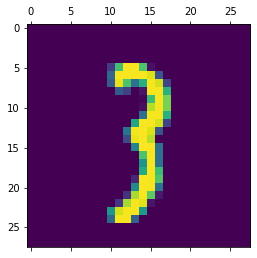

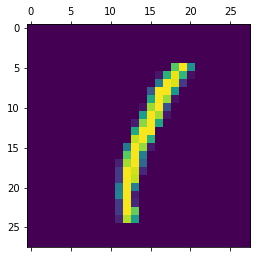

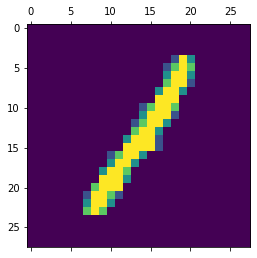

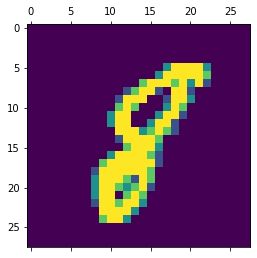

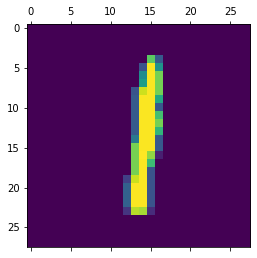

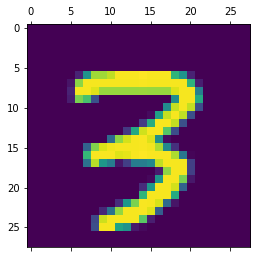

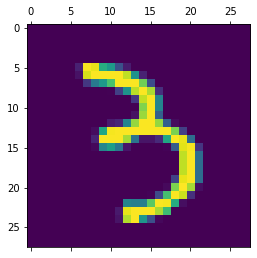

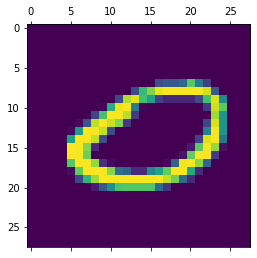

In [ ]:
for i in range(1, 10):
    example = np.reshape(X_train[i], (28, 28))
    plt.matshow(example)
    print(y_train[i])

## Training model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
hist = model.fit(
    X_train, y_train, 
    epochs = 10
)

Epoch 1/10
880/880 [==============================] - 4s 3ms/step - loss: 0.3610 - accuracy: 0.8976
Epoch 2/10
880/880 [==============================] - 2s 3ms/step - loss: 0.1734 - accuracy: 0.9499
Epoch 3/10
880/880 [==============================] - 2s 3ms/step - loss: 0.1231 - accuracy: 0.9647
Epoch 4/10
880/880 [==============================] - 2s 3ms/step - loss: 0.0938 - accuracy: 0.9730
Epoch 5/10
880/880 [==============================] - 2s 2ms/step - loss: 0.0750 - accuracy: 0.9777
Epoch 6/10
880/880 [==============================] - 2s 3ms/step - loss: 0.0585 - accuracy: 0.9832
Epoch 7/10
880/880 [==============================] - 2s 2ms/step - loss: 0.0470 - accuracy: 0.9866
Epoch 8/10
880/880 [==============================] - 2s 2ms/step - loss: 0.0374 - accuracy: 0.9888
Epoch 9/10
880/880 [==============================] - 2s 3ms/step - loss: 0.0307 - accuracy: 0.9915
Epoch 10/10
880/880 [==============================] - 2s 2ms/step - loss: 0.0238 - accuracy: 0.9938

## Training result

In [ ]:
model.evaluate(X_test, y_test)

434/434 [==============================] - 1s 2ms/step - loss: 0.1058 - accuracy: 0.9697


[0.10577532649040222, 0.9696969985961914]

In [ ]:
y_test_predicted = model.predict(X_test)
y_test_predicted_labels = [np.argmax(c) for c in y_test_predicted]

In [ ]:
confusion_matrix = tf.math.confusion_matrix(
    labels = y_test, predictions = y_test_predicted_labels
)

confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1309,    0,    3,    3,    2,    1,   10,    2,    2,    1],
       [   0, 1507,    5,    0,    1,    1,    1,    1,    4,    0],
       [   4,    8, 1367,   10,    8,    0,    2,    5,    7,    3],
       [   2,    3,    6, 1404,    0,   15,    0,   13,   19,    9],
       [   1,    1,    4,    0, 1316,    1,    7,    2,    1,   25],
       [   4,    4,    0,   21,    3, 1142,   14,    1,    5,   11],
       [   5,    3,    1,    1,    4,    1, 1377,    0,    4,    1],
       [   0,    6,    9,    0,    6,    5,    0, 1440,    0,   14],
       [   4,    8,   10,    6,    8,    2,    9,    2, 1278,    7],
       [   4,    1,    6,    4,   13,    1,    0,   15,    4, 1300]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

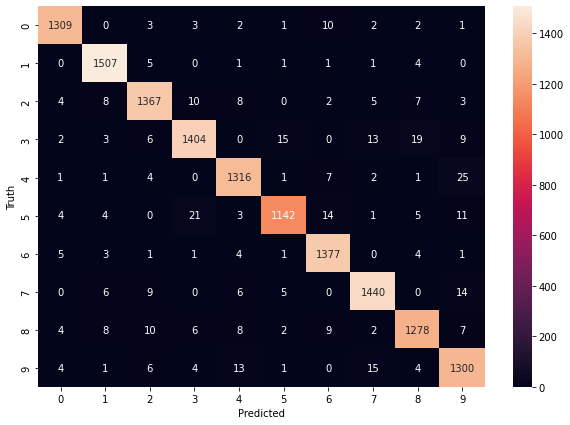

In [ ]:
plt.figure(figsize = (10, 7))
sb.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Create submission file

In [ ]:
sub_df = pd.read_csv(test_csv)

In [ ]:
y_ = []
count = 0
for x in sub_df.values:
    count += 1
    if count % 1000 == 0:
        print('1k passed')
    pred_ = model.predict(np.reshape(x, (-1, 784)))[0]
    y_.append(pred_)

1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed
1k passed


In [ ]:
image_id = np.array(range(1, len(sub_df) + 1))

In [ ]:
image_id

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [ ]:
result_np = np.array([np.argmax(c) for c in y_])

In [ ]:
result_np

array([2, 0, 9, ..., 3, 4, 2])

In [ ]:
result_df = pd.DataFrame({'ImageId' : image_id, 'Label' : result_np})

In [ ]:
result_df.to_csv('submission.csv', index = False)